# Урок 6. Задача lookalike (Positive Unlabeled Learning)#

<img src='https://drive.google.com/uc?export=view&id=1tgPJoFNVVULBpB8DcT2O0AYnSgZolbEH'>

Пример задачи - один клиент в магазине не купил корм для кошек, но если мы ему скажем о корме, может ли он его купить?

Программа урока:
1. Теоретическая часть:

     - Задача обучения с учителем (повторение)
     - Примеры кейсов, когда разметка содержит только наблюдения положительного класса
     - Какие задачи не относятся к lookalike


2. Практическая часть
    - Метод решения random negative sampling
    - Метод 2-step approach
    - Метод spy
    - Сравнение методов между собой на датасете, для которого метки известны
    - Сравнение лучшего метода с моделью, построенной на данных, для которых известны метки всех классов

<img src='https://drive.google.com/uc?export=view&id=1EqTtbS848-pfoWA-MTV8scVmbYyoB0Sy' width=800>

Т.е в "стандартной" постановке задачи обучения с учителем у нас есть разметка.

Например, если мы решаем задачу бинарной классификации, то у нас есть объекты с метками обоих классов (positive/negative).

На практике часто бывает так, что мы сравнительно легко можем определить объекты одного класса (дпопустим, мы легко понимаем, какие объекты можно назвать положительными), но при этом возникают сложности с определением объектов другого класса (негативы).

<img src='https://drive.google.com/uc?export=view&id=1begp9Rz9FI0DZ1Ff_jmcYRlYsK9SIXHB'>

Примеры задач:

- Продвижение услуг и приложений
- Выделение сегмента пользователей, которые совершат нужное нам целевое действие

<img src='https://drive.google.com/uc?export=view&id=1FoFble2hEnexFOpIbQWyMheFv92Tlieh'>

a) Выделяем только группу позитивно размеченного класса. Хорошей похожести вряд ли найдем, т.к. ищем похожих только в одной группе

b) Строим более интересную границу, чтобы обобщить неразмеченные объекты и интерпретировать их не как отрицание, а как положительный объект.

### Более формальное описание задачи

1. оценивается вероятность того, что пользователь совершит некоторое целевое действие (приобретение подписки, установка или регистрация в приложении и т.д)
2. У нас есть только те, кто совершил это действие - это positives. При этом нет определения того, что такое negative. Все, кроме P - Unlabeled (U)
3. Нам нужно как-то собрать выборку и обучить модель, которая будет отличать P от N 


Обучение на PU данных нетривиально. Существует 2 возможных объяснения, почему конкретный объект не имеет метки класса:
1. это объект класса 0 (True negative)
2. это объект класса 1, но просто неразмеченный

## PU learning (варианты решения)


1. Random negative sampling
2. 2-step approach
3. SPY
4. … (много других)

### 1. Random negative sampling

Другое название random negative sampling -> The Selected Completely At Random (SCAR)

- Семплируем подможножество из U и присваиваем им метку 0 (множество N)
- Строим бинарный классификатор, который учится различать N от P
- Используем полученный классификатор без дополнительных телодвижений


Здесь не можем строить точную модель, т.к. не уверены в своем множестве N, так что нужно позволить модели ошибаться.

- random negative sampling основан на предположении, что размеченные данные являются независимыми и одинаково распределенными
- random negative sampling очень популярен, но главным образом благодаря тому, что проблема в итоге сводится к задаче бинарной классификации

Ниже на картинке пример, если размеченные данные (Labeled Positive) выбраны независимо и равновероятно из генеральной совокупности (множества всех позитивов - Unlabeled Positive)

<img src='https://drive.google.com/uc?export=view&id=1iLurg0reVcqyb1UJqnQDVLY2vk9az6jo' width=600>

Ниже на картинке пример, где мы уже видим, что семплирование смещено. 

<img src='https://drive.google.com/uc?export=view&id=17vzbOt7QrAEA2AN6lAVTkE4p36TEfFPC' width=600>

RNS - одностадийный и слишком простой.

### 2-step approach

<img src='https://drive.google.com/uc?export=view&id=1KQKwTm_Wx68SLal456Bk8oVMtgkgsRjf' width=600>

#### Или словами:

1. определяем RN (reliable negatives) (по факту это делаем шаг Random Negative Sampling'a).
2. Используем метод обучения с учителем для обучения классификатора на P, RN
3. Сделаем предсказание этой моделью на всем множестве U, проскорим и выберем топ объектов, которые вероятней всего принадлежат множеству N.
4. Обучаем еще раз модель на P и проскоренных N из RN.
5. Можно повторять шаги несколько раз.

### 3. Алгоритм Spy


<img src='https://drive.google.com/uc?export=view&id=1MYczAPDN0rlCyvf2fFS4_KaytGHreTGt'>

- Семплируем множество S из P и помещаем их в U
- S - это шпионы (позитивные примеры)
- Обучение классификатор на P-S (метка 1) и UuS (метка 0)
- Смотрим, какие вероятности получили элементы S, чтобы определить порог для выбора RN (надежные негативы)


### Разметить все неразмеченные данные как Negatives

Но конечно такой метод на практике почти не используется, хотя и очень прост и понятен.

## Пример 1

1. сгенерируем игрушечный датасет из двух множеств так, чтобы они немного пересекались с помощью https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [39]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

2. Нарисуем график с нашими и данными. Часть данных (250 примеров) размечена как позитивы, остальные - неразмечены

labeled samples: 250


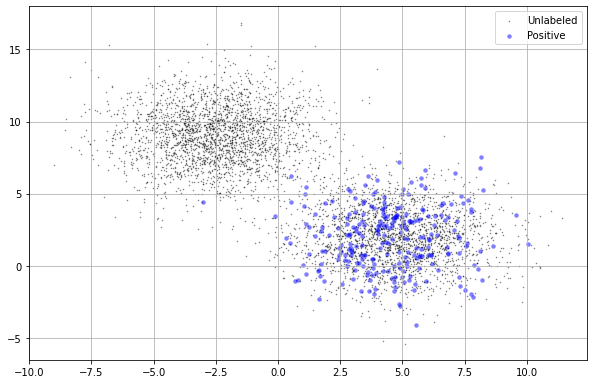

In [2]:
N = 5000
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=2,
                #   cluster_std=5,
                  random_state=42)

rp = np.random.permutation(int(N/2))

data_P = X[y == 1][rp[:int(len(rp) * known_labels_ratio)]]

data_U = np.concatenate(
    (X[y == 1][rp[int(len(rp) * known_labels_ratio):]], X[y == 0]),
    axis=0)

print(f"labeled samples: {data_P.shape[0]}")

plt.figure(figsize=(10, 6.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', lw=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', lw=0, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend();

3. Обучим 1000 деревьев решений, используя bagging
4. Предсказания делаем oob (out-of-the-bag) и затем для каждого примера мы все прогнозы усредняем

Что такое bagging (ссылка - https://en.wikipedia.org/wiki/Bootstrap_aggregating)

<img src='https://drive.google.com/uc?export=view&id=1Qcpg4-KWmDV8hL_DKdULd5580bQETaoy'>

In [3]:
NP = data_P.shape[0]
NU = data_U.shape[0]

num_trees = 1000
train_label = np.zeros(shape=(NP+NP,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))

for i in range(num_trees):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=NP)
    
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)

    # Train model
    model = DecisionTreeClassifier(class_weight='balanced')
    model.fit(data_bootstrap, train_label)
    
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1

predict_proba = f_oob[:, 1] / n_oob

5. наконец, посчитаем Precision, Recall и оптимальный порог и посмотрим, как наш алгоритм справился (ведь мы для наших данных знаем реальные метки классов)

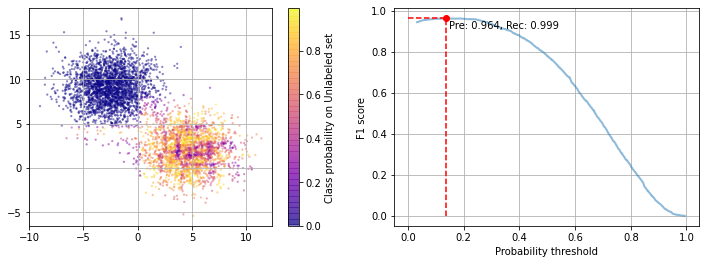

In [4]:
# Plot the class probabilities for the unlabeled samples
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
sp= ax1.scatter(data_U[:, 0], data_U[:, 1], c=predict_proba, 
                lw=0, s=5, alpha=0.5, cmap=plt.cm.plasma, label='unlabeled')
plt.grid()
plt.colorbar(sp, label='Class probability on Unlabeled set')

true_labels = np.zeros(shape=(data_U.shape[0]))
true_labels[:int(len(rp) * (1.0 - known_labels_ratio))] = 1.0

precision, recall, th = precision_recall_curve(true_labels, predict_proba)
ax2 = fig.add_subplot(1, 2, 2)
f1s = precision[:-1] * recall[:-1]
ax2.plot(th, f1s, lw=2, alpha=0.5)

best_th = np.argmax(f1s)
ax2.plot(th[best_th], f1s[best_th], c='r', marker='o')
ax2.plot([th[best_th], th[best_th]], [0.0,f1s[best_th] ], 'r--')
ax2.plot([0.0, th[best_th]], [f1s[best_th], f1s[best_th] ], 'r--')
ax2.annotate(f'Pre: {precision[best_th]:.3f}, Rec: {recall[best_th]:.3f}', 
             xy=(th[best_th]+ 0.01, f1s[best_th]-0.05))
ax2.set_ylabel('F1 score')
ax2.set_xlabel('Probability threshold')
plt.grid()


Видим, что наши данные очень неплохо разделяются и хорошие показатели pr/rec.

Получившуюся модель можно использовать больше даже никак конечная модель, а как инструмент разметки нашей базы.

## Пример 2

Есть аудитория магазина и покупки за некоторый период

Датасет предметов (товаров):

In [40]:
!wget 'https://drive.google.com/uc?export=download&id=1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt' -O items.csv

--2022-04-01 17:36:22--  https://drive.google.com/uc?export=download&id=1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt
Resolving drive.google.com (drive.google.com)... 108.177.98.100, 108.177.98.113, 108.177.98.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l80v2u38oql090uoff1932r4cbc75kaj/1648834575000/14904333240138417226/*/1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt?e=download [following]
--2022-04-01 17:36:23--  https://doc-14-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l80v2u38oql090uoff1932r4cbc75kaj/1648834575000/14904333240138417226/*/1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt?e=download
Resolving doc-14-c0-docs.googleusercontent.com (doc-14-c0-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-14-c0-docs.googleusercontent.com (doc-14-c0-docs

In [6]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt


items = pd.read_csv("items.csv")
print(f"Num unique items: {items.shape[0]}\nNum unique categories: {len(items['item_type'].unique())}")
items.head(3)

Num unique items: 10237
Num unique categories: 10


,Name,item_category,item_brand,item_weight,item_type
0,зубная паста лакалют актив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
1,зубная паста лакалют сенситив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
2,зубная паста лесной бальзам ромашка и облепиха...,"Красота, гигиена, бытовая химия",лесной бальзам,NaN,зубная паста


Покупки

In [7]:
!wget 'https://drive.google.com/uc?export=download&id=1XngPllkMD71ENaKetD9PuihFtJUWmpea' -O purchases.csv

--2022-04-01 17:14:46--  https://drive.google.com/uc?export=download&id=1XngPllkMD71ENaKetD9PuihFtJUWmpea
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.139, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ocfa0gr3kl83i5d4m5ru70ibqtgsdsah/1648833225000/14904333240138417226/*/1XngPllkMD71ENaKetD9PuihFtJUWmpea?e=download [following]
--2022-04-01 17:14:47--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ocfa0gr3kl83i5d4m5ru70ibqtgsdsah/1648833225000/14904333240138417226/*/1XngPllkMD71ENaKetD9PuihFtJUWmpea?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs

In [8]:
purchases = pd.read_csv("purchases.csv")
print(f"Num unique users: {len(purchases['user_id'].unique())}")
purchases.columns = ['user_id', 'Name']
purchases.head(3)

Num unique users: 32000


,user_id,Name
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо..."
1,ba82ad84-3a19-5a91-8e1e-7fd87628afb4,пюре тема говядина с гречкой с 8 месяцев
2,74a2856d-f0ec-59a6-89f3-1f80b294e852,колбаса микоян сервелат кремлевский варено-коп...


**Задача: Нужно провести акцию с предложением чая (со скидкой) 5 тысячам пользователей (всего у нас 32 тысячи)**

Варианты решения задачи:
1. Случайная выборка
2. Что-то более умное (сведем все к задаче lookalike)

Возможный алгоритм:
1. Выбираем по базе тех, кто покупал чай ранее - это наши позитивы 
2. Решаем задачу бинарной классификации (lookalike)
3. Скорим нашу аудиторию
4. Берем топ 5 тысяч
5. Запускаем рекламную кампанию

Далее дожидаемся окончания кампании и анализируем результаты

Для начала поджойним предметы и покупки

In [9]:
purchases = pd.merge(purchases, items)
purchases.head(3)

,user_id,Name,item_category,item_brand,item_weight,item_type
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
1,b4a10859-3f8c-5dc1-8d5d-5977f9aa8bde,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
2,464053f2-ead4-500e-8486-9d5d66c1bbd7,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад


Теперь посмотрим сколько у нас было пользователей, покупавших ранее чай

In [10]:
len(purchases[purchases['item_type'] == 'чай']['user_id'].unique())

1360

1360 любителей чая (нам нужно 5000 по условию задачи). 

Давайте разметим наш датасет (все кто покупал чай в прошлом - метка 1) - это класс 1. 

Мы предполагаем, что людям со схожими на класс 1 предпочтениями и покупками (но не покупавшие чай), также понравится и чай. На этом предположении мы и двигаемся дальше. 

In [11]:
purchases['y'] = purchases['item_type'].apply(lambda x: 1 if x == 'чай' else 0)
purchases.head()

,user_id,Name,item_category,item_brand,item_weight,item_type,y
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
1,b4a10859-3f8c-5dc1-8d5d-5977f9aa8bde,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
2,464053f2-ead4-500e-8486-9d5d66c1bbd7,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
3,baf7d53b-3170-5984-b05c-c5d2b8788d57,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
4,ef6beb0e-a09e-5372-aa91-eb467f117aa8,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0


Попробуем для начала использовать просто список прошлых покупок (поле Name)

In [12]:
X = purchases.groupby(['user_id']).agg({
    'Name': lambda x: list(x),
    'y': lambda x: max(x)
})

X['user_id'] = [i for i in X.index.values]
X.columns = ['purchases', 'y', 'user_id']
X = X[['user_id', 'purchases', 'y']]
X.index = range(len(X))
X.head(3)

,user_id,purchases,y
0,00002f01-66e4-5ab8-8d1a-1562a4ddd418,[зубная паста splat stress off антистресс 75мл...,0
1,0000fed8-b063-51ef-8ca4-c42c5bd022ad,[шоколад schogetten black & white молочный с к...,0
2,0004cfe8-bcb2-5a2c-904b-643e0469cbe3,"[шоколад воздушный темный 85г, сыр белебеевски...",0


Посмотрим на соотношение классов (P vs U), где P - позитивы и U - все остальные неразмеченные данные

In [13]:
X['y'].value_counts()

0    30640
1     1360
Name: y, dtype: int64

In [14]:
X['purchases'] = X['purchases'].apply(lambda x: " ".join(x), 1)
X.head()

,user_id,purchases,y
0,00002f01-66e4-5ab8-8d1a-1562a4ddd418,зубная паста splat stress off антистресс 75мл ...,0
1,0000fed8-b063-51ef-8ca4-c42c5bd022ad,шоколад schogetten black & white молочный с ку...,0
2,0004cfe8-bcb2-5a2c-904b-643e0469cbe3,шоколад воздушный темный 85г сыр белебеевский ...,0
3,000b8172-b96d-5c99-a418-fe1ca156bee1,шампунь pantene pro-v интенсивное восстановлен...,0
4,000bf80e-219c-53b7-a000-6c3474c2bd14,шоколад schogetten black & white молочный с ку...,0


Будем используем обычный random negative sample

In [15]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, X['y'], random_state=0)

У нас есть разметка (известные позитивы) и поле purchases (список покупок) из которого мы можем извлекать признаки. В качестве признаков будем использовать tfidf

In [16]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

pipeline = Pipeline([('purchases_selector', FeatureSelector(column='purchases')), 
                     ('purchases_tfidf', TfidfVectorizer()), 
                     ('clf', LogisticRegression())])

In [17]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('purchases_selector', FeatureSelector(column='purchases')),
                ('purchases_tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression())])

In [18]:
tfidf = pipeline.named_steps['purchases_tfidf']
len(tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5848

In [19]:
df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(X_test['purchases'].iloc[:10]))
df = pd.DataFrame(df)
df.columns = tfidf.get_feature_names_out()
df

,000,04,05,0601,0г,0кг,0л,0манго,10,100,...,японски,японский,японского,японской,яркие,яркий,яркость,ярлычка,ярлычками,яшкино
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Получим прогнозы для "тестовой" выборки

In [20]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([0.00987465, 0.00454258, 0.00221269, 0.02663074, 0.00402058,
       0.02508175, 0.00269904, 0.11747235, 0.01075453, 0.0036021 ])

In [21]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.2898588358747974, F-Score=0.973, Precision=0.980, Recall=0.966


Довольно неплохие на первый взгляд метрики. Давайте теперь проскорим всю выборку и отсортируем по убыванию прогноза (ведь нам в итоге нужно взять топ 5000 пользователей)

In [22]:
X['y_pred'] = pipeline.predict_proba(X)[:, 1]
X = X.sort_values('y_pred', ascending=False)
X.head(3)

,user_id,purchases,y,y_pred
1675,0d2f872b-6a49-5e95-9f2b-3ec9f9365dc6,"чай dammann зеленый с жасмином, 25пак*2г корм ...",1,0.999988
19586,9c753d40-22ef-5491-b907-ff76f03d2044,шоколад chokodelika темный с грецким орехом 16...,1,0.999952
15436,7c615620-53bf-59ce-8186-8d4f88ceca73,"шоколад lindt creation тёмный с мятой 0,15кг н...",1,0.999933


Наконец, возьмем наши топ 5000 пользователей

In [23]:
selected_users = X.iloc[:5000]['user_id'].values

Давайте попробуем понять, чем они отличаются от всех остальных (если отличаются вообще)

In [24]:
purchases[purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

кофе            0.22604
шоколад         0.20240
напиток         0.13028
шампунь         0.12380
чай             0.06292
сыр             0.06284
зубная паста    0.05548
колбаса         0.05180
пюре            0.04372
корм            0.04072
Name: item_type, dtype: float64

In [41]:
purchases[~purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

колбаса         0.224785
зубная паста    0.178756
корм            0.125830
шоколад         0.105156
шампунь         0.097193
напиток         0.096600
сыр             0.065822
кофе            0.054111
пюре            0.051748
Name: item_type, dtype: float64

Посмотрим на feature_importances

In [26]:
feature_names = pipeline.named_steps["purchases_tfidf"].get_feature_names_out()
feature_weights = pipeline.named_steps["clf"].coef_[0]

weights = pd.DataFrame({
    'feature_name': feature_names,
    'feature_weight': feature_weights
}).sort_values('feature_weight', ascending=False)

# топ 100 слов
weights['feature_name'].iloc[:100].values

array(['чай', 'черный', '25пак', 'листовой', 'зеленый', '2г', 'fuzetea',
       'greenfield', '20', 'байховый', '20пак', 'ahmad', '8г',
       'пакетиков', '100пак', '25', 'крупнолистовой', 'tess', 'curtis',
       'травяной', 'richard', 'майский', '5г', 'ароматом', 'grey',
       'hyleys', 'dammann', 'принцесса', 'basilur', 'the', 'цейлонский',
       'ceylon', 'шиповник', 'maitre', 'milford', 'азерчай', '20п',
       'nadin', 'китайский', 'newby', 'de', 'пирамидках', 'mlesna', '50г',
       'пирамидок', 'жасмином', 'sonnentor', 'earl', 'чабрецом', 'нури',
       'vитамин', 'twinings', 'грей', 'green', 'гармония', '200г',
       'витацентр', 'английский', '20пир', 'айдиго', 'жень', 'японски',
       'тянь', 'цейлон', 'индийский', 'ромашка', 'природы', '75л',
       'grace', 'akbar', 'чёрный', 'ява', 'collection', 'добавками',
       'иван', 'улун', 'riston', 'холодный', '25шт', 'вкусов',
       'среднелистовой', 'breakfast', '0г', 'юдзу', 'дракон', 'мелиссой',
       'пакетированный',

Понятно, что если в названии покупки есть что-то про чай, то это явный маркер для классификатора, что это объект класса 1. 

Также по распределению категорий видно также что топ5000 существенно отличаются от остальных

В рекламе одна из важнейших прикладных задач - lookalike. Часто она решается именно как задача PU

## Пример 3

Расмотрим пример на датасете из репозитория UCI - задача поиска поддельных купюр. Признаки - это 4 аппартно измеримые характеристики. 

Описание данных - https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Ссылка на google drive: https://drive.google.com/file/d/1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih

In [27]:
!wget 'https://drive.google.com/uc?export=download&id=1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih' -O data_banknote_authentication.txt

--2022-04-01 17:14:53--  https://drive.google.com/uc?export=download&id=1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih
Resolving drive.google.com (drive.google.com)... 74.125.20.113, 74.125.20.101, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bd4l1gn3voee7jn2c0a91dlcbcmmih6v/1648833225000/14904333240138417226/*/1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih?e=download [following]
--2022-04-01 17:14:53--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bd4l1gn3voee7jn2c0a91dlcbcmmih6v/1648833225000/14904333240138417226/*/1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih?e=download
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.goo

In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_banknote_authentication.txt", header=None)
data.head(3)

,0,1,2,3,4
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


У нас есть 4 признака и 1 целевая переменная (бинарная) - нужно определить поддельная купюра или нет

In [29]:
print(data.shape)

(1372, 5)


Всего 1372 купюры

Посмотрим на соотношение классов

In [30]:
data.iloc[:, -1].value_counts()

0    762
1    610
Name: 4, dtype: int64

Разбиваем выборку на тренировочную и тестовую части и обучаем модель (в примере - градиентный бустинг)

In [31]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [32]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

Проверяем качество

In [33]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print(f"f1: {f1 * 100.0:.2f}%") 
    roc = roc_auc_score(y_test, y_predict)
    print(f"roc: {roc * 100.0:.2f}%") 
    rec = recall_score(y_test, y_predict, average='binary')
    print(f"recall: {rec * 100.0:.2f}%") 
    prc = precision_score(y_test, y_predict, average='binary')
    print(f"precision: {prc * 100.0:.2f}%" ) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 99.57%
roc: 99.57%
recall: 99.15%
precision: 100.00%


### Теперь очередь PU learning

Представим, что нам неизвестны негативы и часть позитивов

In [34]:
mod_data = data.copy()

# get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:, -1].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
perc = 0.25
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 153/610 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [35]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    1219
 1     153
Name: class_test, dtype: int64


* 153 позитивных примеров (1)
* 1219 без разметки (-1)

In [36]:
mod_data.head(10)

,0,1,2,3,4,class_test
0,3.62160,8.6661,-2.80730,-0.44699,0,-1
1,4.54590,8.1674,-2.45860,-1.46210,0,-1
2,3.86600,-2.6383,1.92420,0.10645,0,-1
3,3.45660,9.5228,-4.01120,-3.59440,0,-1
4,0.32924,-4.4552,4.57180,-0.98880,0,-1
5,4.36840,9.6718,-3.96060,-3.16250,0,-1
6,3.59120,3.0129,0.72888,0.56421,0,-1
7,2.09220,-6.8100,8.46360,-0.60216,0,-1
8,3.20320,5.7588,-0.75345,-0.61251,0,-1
9,1.53560,9.1772,-2.27180,-0.73535,0,-1


### random negative sampling

Помним, что (x_data) содержит целевой признак, который будем использовать для оценки качества

Отделими [:-2] как истиный класс для проверки, и [:-1] как данные для входной разметки PUL

In [37]:
mod_data = mod_data.sample(frac=1)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
sample_test = data_N[data_P.shape[0]:]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(153, 6) (153, 6)


In [38]:
model = xgb.XGBClassifier()
sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0

model.fit(sample_train.drop(columns=['class_test', 4]), 
          sample_train['class_test'])

y_predict = model.predict(sample_test.drop(columns=['class_test', 4]))
evaluate_results(sample_test[4], y_predict)

Classification results:
f1: 86.67%
roc: 88.55%
recall: 79.19%
precision: 95.71%


**Краткие выводы**

Positive-Unlabeled (PU) learning можно перевести как «обучение на основе положительных и неразмеченных данных». 

По сути, PU learning —  это аналог бинарной классификация для случаев, когда имеются размеченные данные только одного из классов, но доступна неразмеченная смесь данных обоих классов. 

В общем случае мы даже не знаем, сколько данных в смеси соответствует положительному классу, а сколько — отрицательному. На основе таких наборов данных мы хотим построить бинарный классификатор: такой же, как и при наличии размеченных данных обоих классов.

## Домашнее задание

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Обучить любой классификатор (какой вам нравится)
3. Разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные примеры (класс 1), а только лишь часть
4. Применить random negative sampling для построения классификатора в новых условиях
5. Сравнить качество с решением из пункта 3 (построить отчет - таблицу метрик)
6. *Поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [43]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [45]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [46]:
passengers_test = pd.read_csv('./test.csv')
passengers_train = pd.read_csv('./train.csv')
passengers_train_copy = passengers_train.copy()
passengers_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
passengers_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
#сделать feature engineering
categorical_columns = ['Embarked', 'Sex']
continuous_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
        ('selector', FeatureSelector(column=cat_col)),
        ('ohe', OHEEncoder(key=cat_col))
    ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
        ('selector', NumberSelector(key=cont_col)),
        ('standardizer', StandardScaler())
    ])
    final_transformers.append((cont_col, cont_transformer))
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(final_transformers)
feature_processing = Pipeline([('feats', feats)])
from xgboost import XGBClassifier

xgboost_pipeline = Pipeline([
    ('features', feats),
    ('classifier', XGBClassifier(objective="binary:logistic", use_label_encoder=False, random_state=42)),
])

In [51]:
#обучить любой классификатор

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

X = passengers_train.drop(columns=['Survived', 'Name', 'PassengerId', 'Ticket', 'Cabin'])
y = passengers_train['Survived']

xgboost_precision_scores = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="precision_macro").mean()
xgboost_recall_scores = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="recall_macro").mean()
xgboost_roc_auc_scores = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="roc_auc").mean()
xgboost_f1_score_scores = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="f1_macro").mean()

In [52]:
data = {
    'xgboost': [
        np.mean(xgboost_precision_scores),
        np.mean(xgboost_recall_scores),
        np.mean(xgboost_roc_auc_scores),
        np.mean(xgboost_f1_score_scores)
    ]
}
before = pd.DataFrame.from_dict(data, orient='index', columns=['precision', 'recall', 'roc_auc', 'f1_score'])
before

,precision,recall,roc_auc,f1_score
xgboost,0.817753,0.795478,0.876701,0.802887


In [54]:
#разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
#этот полностью размеченный датасет. ПУсть нам неизвестны негативы и часть позитивов.

mod_data = passengers_train_copy
# get the indices of the positives samples
pos_ind = np.where(mod_data['Survived'].values == 1)[0]
# shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')

pos_sample = pos_ind[:pos_sample_len]

Using 86/342 as positives and unlabeling the rest


In [55]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1

print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    805
 1     86
Name: class_test, dtype: int64


In [56]:
mod_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-1


In [57]:
x_data = mod_data.iloc[:,:-1].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-1].values # original class

#применить random negative sampling для построения классификатора в новых условиях

mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]

print(neg_sample.shape, pos_sample.shape)

sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(86, 13) (86, 13)


In [58]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0))
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
columns_to_drop = ['Survived']
target = 'class_test'

X = sample_train.drop(columns=['Survived', 'Name', 'PassengerId', 'Ticket', 'Cabin'])
y = sample_train['Survived']

xgboost_precision_scores_after = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="precision_macro").mean()
xgboost_recall_scores_after = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="recall_macro").mean()
xgboost_roc_auc_scores_after = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="roc_auc").mean()
xgboost_f1_score_scores_after = cross_val_score(xgboost_pipeline, X, y, cv=cv, scoring="f1_macro").mean()

In [59]:
data = {
    'xgboost': [
        np.mean(xgboost_precision_scores_after),
        np.mean(xgboost_recall_scores_after),
        np.mean(xgboost_roc_auc_scores_after),
        np.mean(xgboost_f1_score_scores_after)
    ]
}
after = pd.DataFrame.from_dict(data, orient='index', columns=['precision', 'recall', 'roc_auc', 'f1_score'])
after

,precision,recall,roc_auc,f1_score
xgboost,0.711135,0.709058,0.77338,0.699863


In [60]:
#сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

before.append(after) 

,precision,recall,roc_auc,f1_score
xgboost,0.817753,0.795478,0.876701,0.802887
xgboost,0.711135,0.709058,0.773380,0.699863


In [61]:
#поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

# если увеличивать долю позитивов качество модели растет

## Ссылки:

1. https://arxiv.org/pdf/1811.04820.pdf
2. https://habr.com/ru/company/JetBrains-education/blog/512032/
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.cs.uic.edu/~liub/publications/EMNLP-2010-no-negative.pdf
5. https://towardsdatascience.com/lookalikes-finding-needles-in-a-haystack-683bae8fdfff